In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score


## Reading and Understanding Data

In [4]:
df = pd.read_csv('linear.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


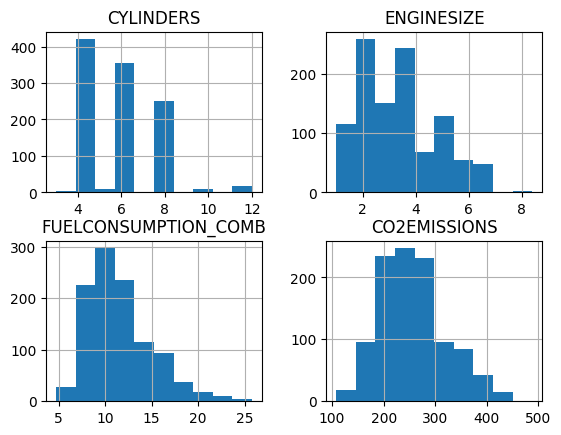

In [22]:
# draw histogram for each column

df.hist()
plt.show()

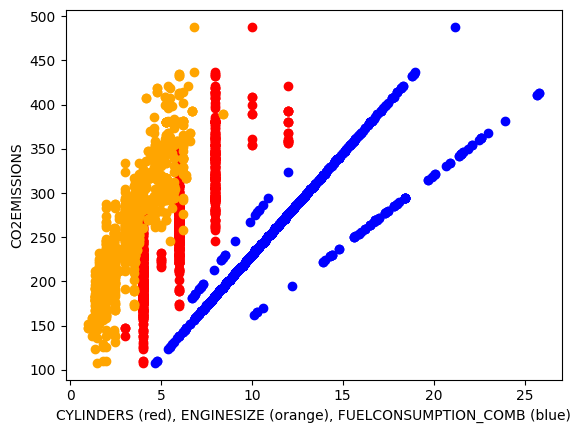

In [21]:
# draw scatter plot

plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color = 'red')
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color = 'orange')
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], color = 'blue')
plt.xlabel('CYLINDERS (red), ENGINESIZE (orange), FUELCONSUMPTION_COMB (blue)')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [116]:
# seprate df to train and test 

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

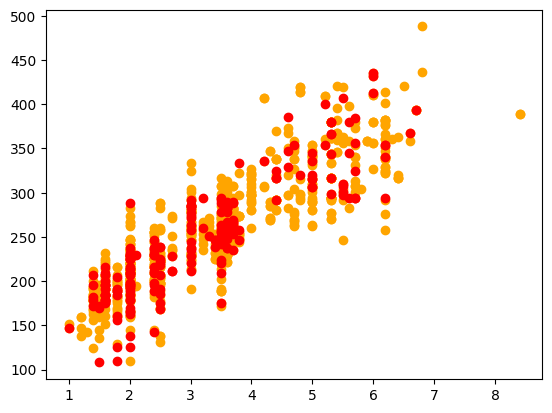

In [117]:
# draw scatter plot for train and test

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color = 'orange')
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'], color = 'red')
plt.show()

## Simple Linear Regression Model

In [118]:
# create model

regr = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]
regr.fit(train_x, train_y)

regr.intercept_, regr.coef_

(array([127.60524371]), array([[38.48705811]]))

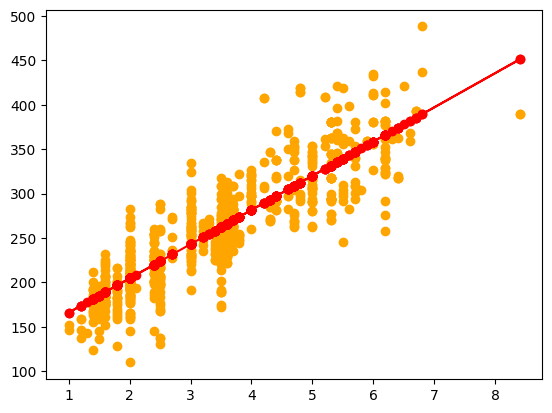

In [119]:
# show model

train_y_ = regr.predict(train_x) # = alpha + beta * train_x

plt.scatter(train_x, train_y, color = 'orange')
plt.plot(train_x, train_y_, '-or')
plt.show()

In [120]:
# test model

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_y_ = regr.predict(test_x)

print(f'MAE: {abs(test_y_ - test_y).mean()[0]} \nMSE: {((test_y_ - test_y) ** 2).mean()[0]} \nRSQ: {r2_score(test_y, test_y_)}')

MAE: 23.713872471512765 
MSE: 954.4705115835153 
RSQ: 0.7787738939400203


## Multiple Linear Regression Model

In [123]:
# create model

regr = linear_model.LinearRegression()
train_x = train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
train_y = train[['CO2EMISSIONS']]
regr.fit(train_x, train_y)

regr.intercept_, regr.coef_

(array([69.80787807]), array([[11.82672888,  6.91021431,  9.21644754]]))

In [128]:
# test model

test_x = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
test_y = test[['CO2EMISSIONS']]
test_y_ = regr.predict(test_x)

print(f'MAE: {abs(test_y_ - test_y).mean()[0]} \nMSE: {((test_y_ - test_y) ** 2).mean()[0]} \nRSQ: {r2_score(test_y, test_y_)}')

MAE: 16.11087071439017 
MSE: 470.5639034798965 
RSQ: 0.8909332255361848
